# LDI Project - Predict market price using ML

In [16]:
# Imports
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt


## Import Data

We'll first try preducting SP500 price, as data is cleaner and with less volatility. Then move to water market

In [17]:
# Load SP500 data from a CSV file
data = pd.read_csv('./data/SP500_data/sp500_index.csv')
sp_index_data = data['Date'].values  # Assuming the closing prices are in the 'Close' column
sp_index_price = data['S&P500'].values

print(sp_index_data)
print(sp_index_price)



['2014-04-30' '2014-05-01' '2014-05-02' ... '2024-04-25' '2024-04-26'
 '2024-04-29']
[1883.95 1883.68 1881.14 ... 5048.42 5099.96 5116.17]


## Predict market price using CNN's

In [18]:
# Prepare the data
# Assuming sp_index_price is initially a 1D numpy array

# Reshape sp_index_price to be a 2D array with one column
sp_index_price = sp_index_price.reshape(-1, 1)

# Split the data into training, validation, and testing sets
train_ratio = 0.4
val_ratio = 0.2
test_ratio = 0.4

train_size = int(len(sp_index_price) * train_ratio)
val_size = int(len(sp_index_price) * val_ratio)
test_size = len(sp_index_price) - train_size - val_size

train_data = sp_index_price[:train_size]
val_data = sp_index_price[train_size:train_size+val_size]
test_data = sp_index_price[train_size+val_size:]

# Prepare the data
def prepare_data(data, lookback):
    X, Y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        Y.append(data[i + lookback, 0])
    return np.array(X), np.array(Y)

# Prepare the training, validation, and testing data
lookback = 20
X_train, Y_train = prepare_data(train_data, lookback)
X_val, Y_val = prepare_data(val_data, lookback)
X_test, Y_test = prepare_data(test_data, lookback)

# Reshape the data for the CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [19]:

# Define the CNN model creation function
def create_model():
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(lookback, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()
    return model


# Create and train the model
regressor = KerasRegressor(model=create_model, epochs=50, batch_size=32)
regressor.fit(X_train, Y_train)

predictions = regressor.predict(X_val)

# Flatten the outputs for plotting
actual_prices_test = Y_test.flatten()
predicted_prices = predictions.flatten()



/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 18, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 9, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,689 (73.00 KB)

 Trainable params: 18,689 (73.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - loss: 1109311.5000 
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 16845.0703
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 1657.2612
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 1624.8097
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 1618.2903
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 1582.7583
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 1638.9888
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 1658.3799
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 1377.0161
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 1270.7590
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 1630.1682
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 1548.3369
Epoch 13/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 1610.8407
Epoch 14/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 1521.1322
Epoch 15/50
31/31 ━━━

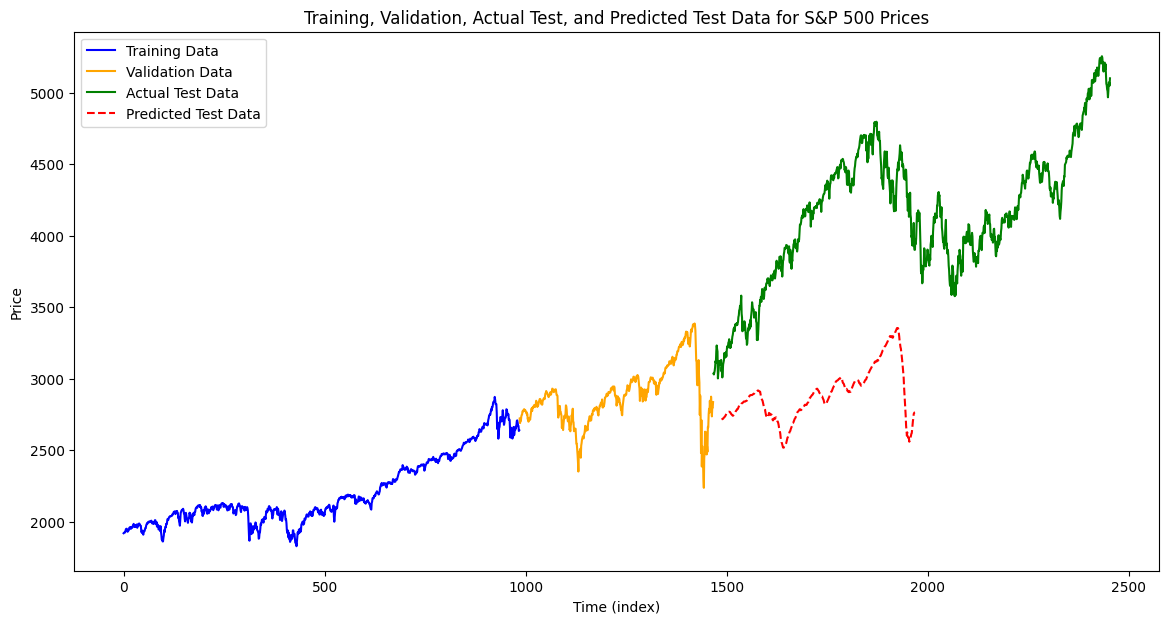

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(range(len(Y_train)), Y_train, label='Training Data', color='blue')

# Plot validation data
val_data_start_index = len(Y_train)
val_data_end_index = val_data_start_index + len(Y_val)
plt.plot(range(val_data_start_index, val_data_end_index), Y_val, label='Validation Data', color='orange')

# Plot test data
test_data_start_index = val_data_end_index
test_data_end_index = test_data_start_index + len(actual_prices_test)
plt.plot(range(test_data_start_index, test_data_end_index), actual_prices_test, label='Actual Test Data', color='green')

# Plot predicted data
predicted_data_start_index = test_data_start_index + lookback
predicted_data_end_index = predicted_data_start_index + len(predicted_prices)
plt.plot(range(predicted_data_start_index, predicted_data_end_index), predicted_prices, label='Predicted Test Data', color='red', linestyle='--')

plt.title('Training, Validation, Actual Test, and Predicted Test Data for S&P 500 Prices')
plt.xlabel('Time (index)')
plt.ylabel('Price')
plt.legend()
plt.show()

### Try with dropout and early stopping

### RNN's with LSTM

Epoch 1/100


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0102 - val_loss: 0.0231
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - val_loss: 0.0190
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - val_loss: 0.0073
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2198e-04 - val_loss: 9.1637e-04
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.6154e-05 - val_loss: 6.9192e-04
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.7521e-05 - val_loss: 7.8447e-04
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0050e-04 - val_loss: 7.4830e-04
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6381e-05 - val_loss: 7.3422e-04
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0002e-04 - val_loss: 7.3994e-04
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6992e-05 - val_loss: 7.2531e-04
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0599e-05 - val_loss: 8.0217e-04
Epoch 12/10

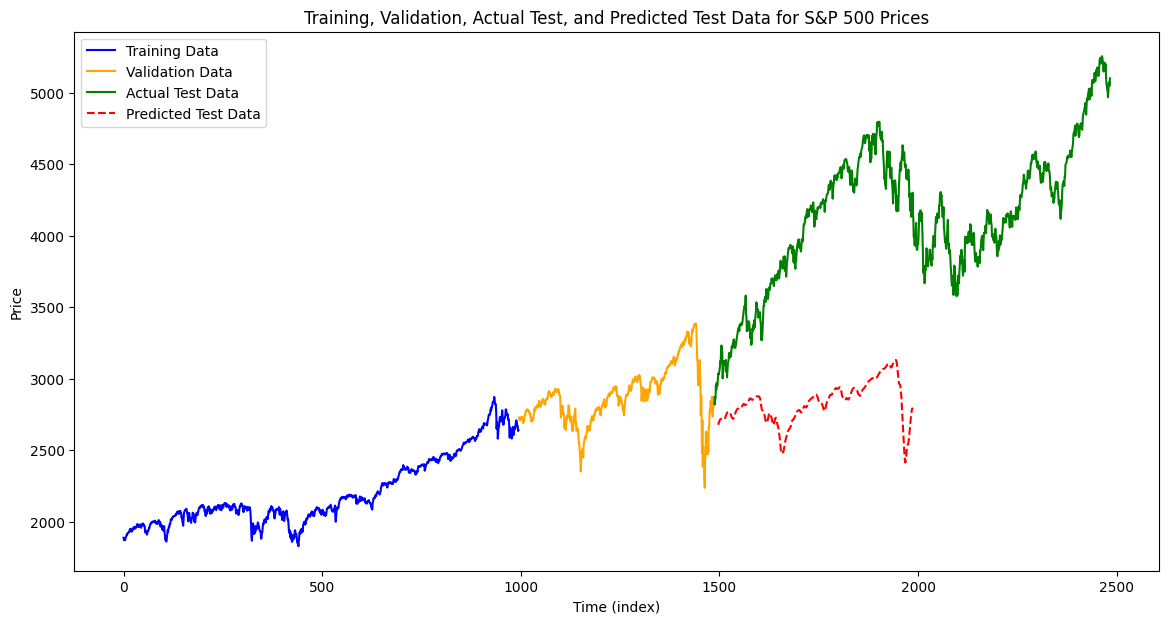

In [21]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare the data
def prepare_data(data, lookback):
    X, Y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        Y.append(data[i + lookback, 0])
    return np.array(X), np.array(Y)

# Assuming you have a numpy array 'sp_index_price' with the S&P 500 price data

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(sp_index_price.reshape(-1, 1))

# Split the data into training, validation, and testing sets
train_ratio = 0.4
val_ratio = 0.2
test_ratio = 0.2

train_size = int(len(scaled_data) * train_ratio)
val_size = int(len(scaled_data) * val_ratio)
test_size = len(scaled_data) - train_size - val_size

train_data = scaled_data[:train_size]
val_data = scaled_data[train_size:train_size+val_size]
test_data = scaled_data[train_size+val_size:]

# Prepare the training, validation, and testing data
lookback = 10
X_train, Y_train = prepare_data(train_data, lookback)
X_val, Y_val = prepare_data(val_data, lookback)
X_test, Y_test = prepare_data(test_data, lookback)

# Reshape the input data for the LSTM model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=5, return_sequences=True, input_shape=(lookback, 1)))
model.add(LSTM(units=5))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_val, Y_val))

# Make predictions on the test data
predicted_prices = model.predict(X_val)

# Inverse scale the predicted prices
predicted_prices = scaler.inverse_transform(predicted_prices)

# Inverse scale the actual prices
actual_prices_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
actual_prices_val = scaler.inverse_transform(Y_val.reshape(-1, 1))
actual_prices_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(range(len(actual_prices_train)), actual_prices_train, label='Training Data', color='blue')

# Plot validation data
val_data_start_index = len(actual_prices_train)
val_data_end_index = val_data_start_index + len(actual_prices_val)
plt.plot(range(val_data_start_index, val_data_end_index), actual_prices_val, label='Validation Data', color='orange')

# Plot test data
test_data_start_index = val_data_end_index
test_data_end_index = test_data_start_index + len(actual_prices_test)
plt.plot(range(test_data_start_index, test_data_end_index), actual_prices_test, label='Actual Test Data', color='green')

# Plot predicted data
predicted_data_start_index = test_data_start_index + lookback
predicted_data_end_index = predicted_data_start_index + len(predicted_prices)
plt.plot(range(predicted_data_start_index, predicted_data_end_index), predicted_prices, label='Predicted Test Data', color='red', linestyle='--')

plt.title('Training, Validation, Actual Test, and Predicted Test Data for S&P 500 Prices')
plt.xlabel('Time (index)')
plt.ylabel('Price')
plt.legend()
plt.show()

### Try with transformers

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0013 - val_loss: 0.0168
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9661e-04 - val_loss: 0.0087
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2939e-04 - val_loss: 0.0045
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6610e-05 - val_loss: 0.0028
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4133e-05 - val_loss: 0.0019
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4051e-05 - val_loss: 0.0028
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.8621e-05 - val_loss: 0.0021
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1915e-05 - val_loss: 0.0025
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.1318e-05 - val_loss: 0.0025
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.8367e-05 - val_loss: 0.0024
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.8828e-05 - val_loss: 0.0027
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━

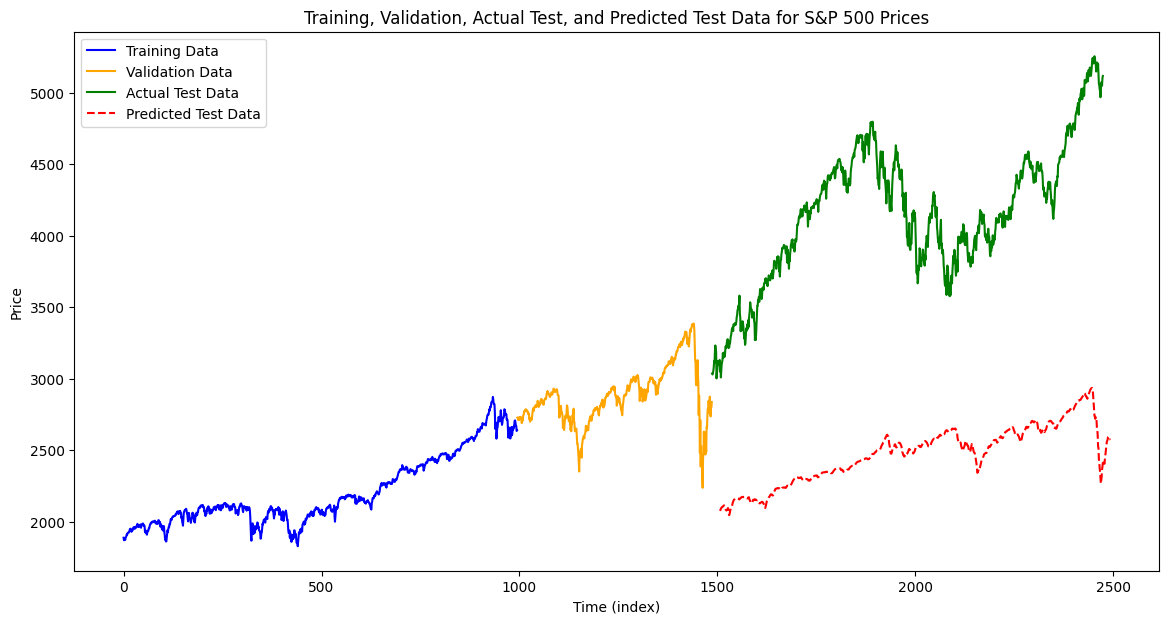

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

# Load data
#sp_index_price = np.random.randn(1000)  # Replace with actual data loading

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(sp_index_price.reshape(-1, 1))

# Split into training, validation, and test sets
train_ratio = 0.2
val_ratio = 0.4
test_ratio = 0.4

train_size = int(len(scaled_data) * train_ratio)
val_size = int(len(scaled_data) * val_ratio)
test_size = len(scaled_data) - train_size - val_size

train_data = scaled_data[:train_size]
val_data = scaled_data[train_size:train_size + val_size]
test_data = scaled_data[train_size + val_size:]

# Create sequences
def create_sequences(data, lookback):
    X, Y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i + lookback])
        Y.append(data[i + lookback])
    return np.array(X), np.array(Y).reshape(-1, 1)

lookback = 20  # Time steps to look back

X_train, Y_train = create_sequences(train_data, lookback)
X_val, Y_val = create_sequences(val_data, lookback)
X_test, Y_test = create_sequences(test_data, lookback)

# Create a simple model
def create_simple_model():
    input_layer = layers.Input(shape=(lookback, 1))
    lstm_layer = layers.LSTM(50)(input_layer)
    dense_layer = layers.Dense(50, activation='relu')(lstm_layer)
    output_layer = layers.Dense(1)(dense_layer)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build and train the model
model = create_simple_model()
model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_val, Y_val))

# Make predictions
predicted_prices = model.predict(X_val)

# Inverse transform
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices_test = scaler.inverse_transform(Y_test)

# Plotting with detailed indices for clarity and comparison
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(range(len(actual_prices_train)), actual_prices_train, label='Training Data', color='blue')

# Plot validation data
val_data_start_index = len(actual_prices_train)
val_data_end_index = val_data_start_index + len(actual_prices_val)
plt.plot(range(val_data_start_index, val_data_end_index), actual_prices_val, label='Validation Data', color='orange')

# Plot test data
test_data_start_index = val_data_end_index
test_data_end_index = test_data_start_index + len(actual_prices_test)
plt.plot(range(test_data_start_index, test_data_end_index), actual_prices_test, label='Actual Test Data', color='green')

# Plot predicted data
predicted_data_start_index = test_data_start_index + lookback
predicted_data_end_index = predicted_data_start_index + len(predicted_prices)
plt.plot(range(predicted_data_start_index, predicted_data_end_index), predicted_prices, label='Predicted Test Data', color='red', linestyle='--')

plt.title('Training, Validation, Actual Test, and Predicted Test Data for S&P 500 Prices')
plt.xlabel('Time (index)')
plt.ylabel('Price')
plt.legend()
plt.show()